In [2]:
import gymnasium as gym
env = gym.make("LunarLander-v2")
observation, _ = env.reset()

print(observation)
print(env.action_space)

fitness = 0.0
terminated = False
truncated = False
while not (terminated or truncated):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    #print(env.action_space.sample())
    print(reward)
    fitness += reward

print(fitness)

[-1.12247464e-04  1.40150809e+00 -1.13919061e-02 -4.18304652e-01
  1.36940231e-04  2.58042244e-03  0.00000000e+00  0.00000000e+00]
Discrete(4)
-1.5763556883478884
-1.7396610889443582
-1.5966912398768034
1.7667739831978906
-1.7219955615290121
-1.570339594545145
-1.435120649490301
-1.6018850925852621
-1.7036264799190224
-1.5929122299109508
-1.8307947283671513
-1.9363010667798892
0.3747555210375538
-2.1182473857732007
-2.147574362965172
0.1452216917027272
-1.7325740012321649
1.1460710966799297
-1.3574450811615282
4.394975341095159
-1.374588816803281
-1.7936994217699282
0.4193595328446918
-1.4407244673400328
-2.020672847164717
2.391701054896271
-1.425575919059695
2.434812225904989
3.7137082995596815
-1.617527955227871
2.6038904541017986
-2.0621740193681135
-1.7145175373596544
1.7807704354025133
-2.210017786421416
-1.306420387772589
-1.5321229118711415
-1.0115049202244666
1.4485560276039677
-1.765679847127841
2.7510702201853805
-0.6332589476882606
-1.0052288867498476
-0.4483581532097378
2.0


 ****** Running generation 0 ****** 

Population's average fitness: -355.11518 stdev: 240.36821
Best fitness: 38.84450 - size: (4, 16) - species 1 - id 121
Average adjusted fitness: 0.740
Mean genetic distance 2.840, standard deviation 0.565
Population of 151 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    39     38.8    0.771     0
     2    0    56    -96.0    0.745     0
     3    0    33   -135.7    0.705     0
     4    0    13   -280.2    0.738     0
     5    0    10       --       --     0
Total extinctions: 0
Generation time: 1.079 sec

 ****** Running generation 1 ****** 

Population's average fitness: -224.86651 stdev: 159.07179
Best fitness: 2.37787 - size: (4, 16) - species 2 - id 275
Average adjusted fitness: 0.697
Mean genetic distance 2.906, standard deviation 0.677
Population of 151 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   

Exception ignored in: <function ParallelEvaluator.__del__ at 0x74d2fc5569e0>
Traceback (most recent call last):
  File "/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/neat/parallel.py", line 21, in __del__
    self.pool.join()
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 669, in join
    p.join()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 147, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Population's average fitness: -133.91007 stdev: 119.08185
Best fitness: 48.38319 - size: (4, 16) - species 7 - id 1017
Average adjusted fitness: 0.717
Mean genetic distance 3.411, standard deviation 0.958
Population of 149 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    19      3.3    0.719     7
     2    7    21    -18.0    0.760     2
     3    7    18     29.7    0.727     5
     4    7    18    -53.0    0.681     4
     5    7    18     23.7    0.747     0
     6    6    18    -36.2    0.731     1
     7    5    17     48.4    0.648     0
     8    4    18    -27.3    0.723     3
     9    0     2       --       --     0
Total extinctions: 0
Generation time: 0.816 sec (0.918 average)

 ****** Running generation 8 ****** 



Exception ignored in: <function ParallelEvaluator.__del__ at 0x74d2fc5569e0>
Traceback (most recent call last):
  File "/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/neat/parallel.py", line 21, in __del__
    self.pool.join()
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 669, in join
    p.join()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 147, in join
    Exception ignored in: <function ParallelEvaluator.__del__ at 0x74d2fc5569e0>
assert self._parent_pid == os.getpid(), 'can only join a child process'Traceback (most recent call last):
  File "/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/neat/parallel.py", line 21, in __del__
    
AssertionErrorself.pool.join(): can only join a child process

  File "/usr/lib/python3.10/multiprocessing/pool.py", line 669, in join
    p.join()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 147, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
As

Population's average fitness: -130.94741 stdev: 100.49953
Best fitness: 51.03750 - size: (5, 17) - species 3 - id 1093
Average adjusted fitness: 0.780
Mean genetic distance 3.412, standard deviation 0.949
Population of 147 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    18     -5.6    0.802     8
     2    8    20     21.4    0.804     3
     3    8    17     51.0    0.751     6
     4    8    17     23.3    0.736     5
     5    8    17     25.7    0.794     0
     6    7    17    -14.8    0.802     2
     7    6    16     15.2    0.737     1
     8    5    16     28.5    0.803     0
     9    1     9   -114.5    0.795     0
Total extinctions: 0
Generation time: 1.104 sec (0.939 average)

 ****** Running generation 9 ****** 

Population's average fitness: -134.15088 stdev: 101.92309
Best fitness: 18.73109 - size: (5, 16) - species 5 - id 1338
Average adjusted fitness: 0.780
Mean genetic distance 3.381, standard d

Exception ignored in: <function ParallelEvaluator.__del__ at 0x74d2fc5569e0>
Traceback (most recent call last):
  File "/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/neat/parallel.py", line 21, in __del__
    self.pool.join()
  File "/usr/lib/python3.10/multiprocessing/pool.py", line 669, in join
    p.join()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 147, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Population's average fitness: -121.26577 stdev: 106.21740
Best fitness: 289.52185 - size: (4, 15) - species 2 - id 1457
Average adjusted fitness: 0.512
Mean genetic distance 3.403, standard deviation 0.889
Population of 149 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    18     28.0    0.543    10
     2   10    15    289.5    0.580     0
     3   10    20     22.0    0.475     8
     4   10    17      3.8    0.519     7
     5   10    15     15.4    0.467     2
     6    9    17     30.0    0.524     4
     7    8    22     17.2    0.501     3
     8    7    15     -1.0    0.517     2
     9    3    10    -88.6    0.481     1
Total extinctions: 0
Generation time: 0.829 sec (0.923 average)

 ****** Running generation 11 ****** 

Population's average fitness: -129.39479 stdev: 109.67038
Best fitness: 29.30849 - size: (4, 13) - species 8 - id 1517
Average adjusted fitness: 0.772
Mean genetic distance 3.402, standard

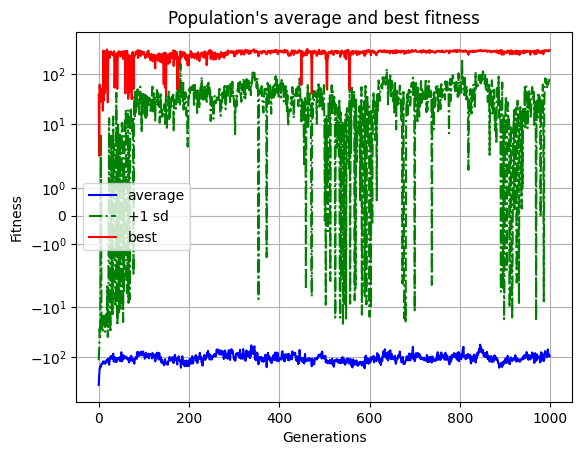

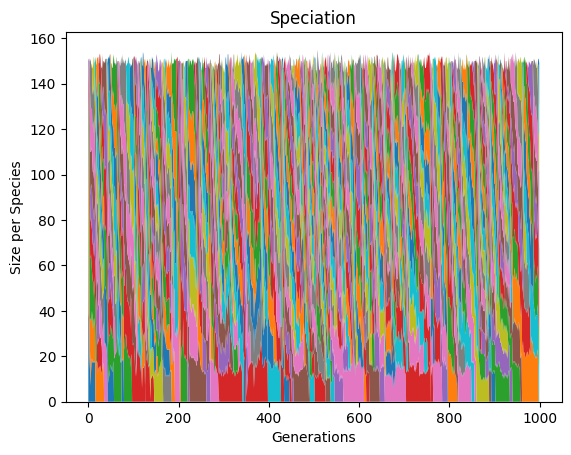

In [3]:
import multiprocessing
import os
import pickle

import cart_pole
import neat
import visualize
import gym
import numpy as np

runs_per_net = 2

# Use the NN network phenotype and the discrete actuator force function.
def eval_genome(genome, config):

    net = neat.nn.FeedForwardNetwork.create(genome, config)

    fitnesses = []

    for runs in range(runs_per_net):
        env = gym.make("LunarLander-v2")

        observation, _ = env.reset()
        #print(observation)
        fitness = 0.0
        terminated = False
        truncated = False
        while not (terminated or truncated):
            
            action = net.activate(observation)
            #print("ACTION: ", action, "\n")
            action =  np.argmax(action)
            #print("ACTION ARGMAX: ", action)
            observation, reward, terminated, truncated, info = env.step(action)
            #print("REWARD: ", reward, "\n")
            fitness += reward

        fitnesses.append(fitness)

    return np.max(fitnesses)

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = eval_genome(genome, config)


def run():
    # Load the config file, which is assumed to live in
    # the same directory as this script.
    local_dir = os.path.dirname('__file__')
    config_path = os.path.join(local_dir, 'LunarLander_config')
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_path)
    
    pop = neat.Population(config)
    stats = neat.StatisticsReporter()
    pop.add_reporter(stats)
    pop.add_reporter(neat.StdOutReporter(True))

    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)
    winner = pop.run(pe.evaluate, 1000)

    # Save the winner.
    with open('winner-LunarLander', 'wb') as f:
        pickle.dump(winner, f)

    print(winner)

    visualize.plot_stats(stats, ylog=True, view=True, filename="LunarLander-fitness.svg")
    visualize.plot_species(stats, view=True, filename="LunarLander-speciation.svg")

    visualize.draw_net(config, winner, True)

    visualize.draw_net(config, winner, view=True, filename="winner-LunarLander.gv")
    #visualize.draw_net(config, winner, view=True, node_names=node_names,
    #                   filename="winner-feedforward-enabled-pruned.gv", prune_unused=True)


if __name__ == '__main__':
    run()

In [1]:
import os
import pickle
import neat
import gym 
import numpy as np

# load the winner
with open('winner-LunarLander', 'rb') as f:
    c = pickle.load(f)

print('Loaded genome:')
print(c)

# Load the config file, which is assumed to live in
# the same directory as this script.
local_dir = os.path.dirname('__file__')
config_path = os.path.join(local_dir, 'LunarLander_config')
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

net = neat.nn.FeedForwardNetwork.create(c, config)


env = gym.make("LunarLander-v2", render_mode='human')
observation, _ = env.reset()

terminated = False
truncated = False
while not (terminated or truncated):
    action = net.activate(observation)
    action =  np.argmax(action)
    observation, reward, terminated, truncated, info = env.step(action)
    env.render()

Loaded genome:
Key: 128504
Fitness: 296.93789356021466
Nodes:
	0 DefaultNodeGene(key=0, bias=1.2848374785311865, response=0.919321163128786, activation=clamped, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-6.451615281394627, response=1.0544637116143298, activation=clamped, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=3.0340452059931975, response=1.0553437165435167, activation=clamped, aggregation=sum)
	3 DefaultNodeGene(key=3, bias=-5.37569581220113, response=0.8750354814898437, activation=clamped, aggregation=sum)
	10211 DefaultNodeGene(key=10211, bias=-0.7215751134865883, response=1.0708655672813796, activation=clamped, aggregation=sum)
	11505 DefaultNodeGene(key=11505, bias=2.6240055719715034, response=0.9703402894182835, activation=clamped, aggregation=sum)
	12762 DefaultNodeGene(key=12762, bias=0.9200028745551903, response=0.9023698500440341, activation=clamped, aggregation=sum)
	15230 DefaultNodeGene(key=15230, bias=1.0054897784042507, response=0.9936155035377792, activati

/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
